In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data= pd.read_csv(r"H:\Data\Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [7]:
data['Gender']= le.fit_transform(data['Gender'])

In [8]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [9]:
import seaborn as sns

<AxesSubplot:>

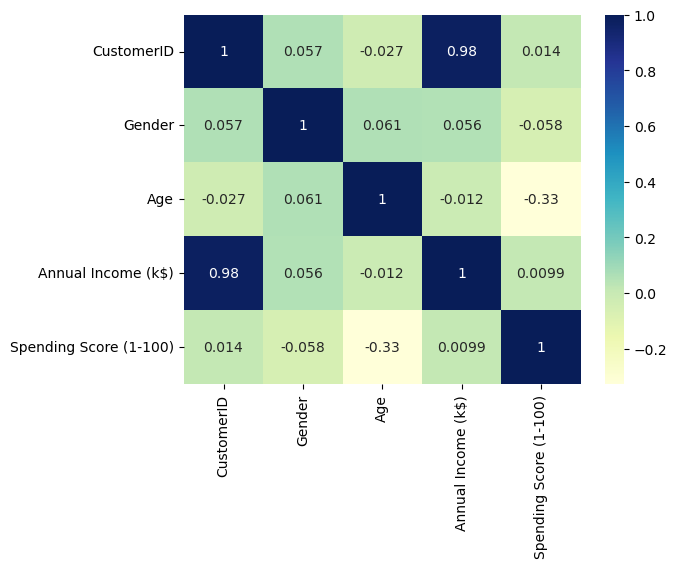

In [10]:
sns.heatmap(data.corr(), cmap= 'YlGnBu', annot= True)

Age and spending score is found to be moderately negatively correlated. Which means young customers are found to be spending less as compare to older customers.

In [11]:
copy_data= data.copy()
customer= copy_data.pop('CustomerID')
copy_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [12]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [13]:
scaled_data= scaler.fit_transform(copy_data)
scaled_data

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [14]:
data2= pd.DataFrame(scaled_data, columns= ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
data2

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


In [15]:
from sklearn.cluster import KMeans

In [16]:
clusters= list(range(2,9))
ssd= []

for NumClusters in clusters:
    test= KMeans(n_clusters= NumClusters, max_iter= 150)
    test.fit(data2)
    ssd.append(test.inertia_)

Text(0, 0.5, 'SSD')

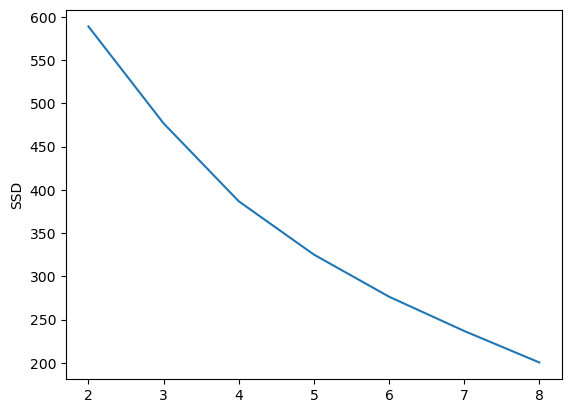

In [17]:
plt.plot(clusters, ssd)
plt.ylabel('SSD')

In [18]:
model= KMeans(n_clusters= 4, max_iter= 150, random_state=15)
model.fit(data2)

KMeans(max_iter=150, n_clusters=4, random_state=15)

In [19]:
model.labels_

array([2, 2, 0, 3, 0, 3, 0, 3, 1, 3, 1, 3, 0, 3, 1, 2, 0, 2, 1, 3, 1, 2,
       0, 2, 0, 2, 0, 2, 0, 3, 1, 3, 1, 2, 0, 3, 0, 3, 0, 3, 0, 2, 1, 3,
       0, 3, 0, 3, 3, 3, 0, 2, 3, 1, 0, 1, 0, 1, 3, 1, 1, 2, 0, 0, 1, 2,
       0, 0, 2, 3, 1, 0, 0, 0, 1, 2, 0, 1, 3, 0, 1, 2, 1, 0, 3, 1, 0, 3,
       3, 0, 0, 2, 1, 0, 3, 2, 0, 3, 1, 2, 3, 0, 1, 2, 1, 3, 0, 1, 1, 1,
       1, 3, 0, 2, 3, 3, 0, 0, 0, 0, 2, 0, 3, 2, 3, 3, 1, 2, 1, 2, 1, 2,
       3, 3, 1, 3, 0, 2, 1, 3, 0, 2, 3, 3, 1, 2, 1, 3, 0, 2, 1, 2, 0, 3,
       0, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 0, 2, 1, 2, 1, 2, 0, 3,
       1, 2, 1, 2, 0, 3, 1, 3, 0, 2, 0, 2, 0, 3, 0, 3, 1, 3, 0, 3, 0, 2,
       1, 2])

In [20]:
data['Labels']= model.labels_

In [21]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Labels
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,0
3,4,0,23,16,77,3
4,5,0,31,17,40,0


In [22]:
data['Labels'].value_counts(ascending= True)

2    40
1    48
0    56
3    56
Name: Labels, dtype: int64